Import packacges.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale
%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('./final_result_impl_normals_int.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

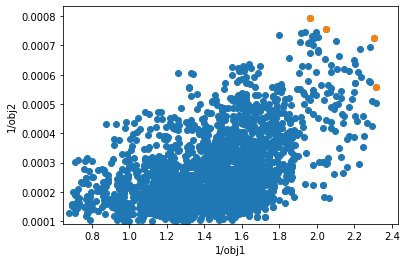

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0


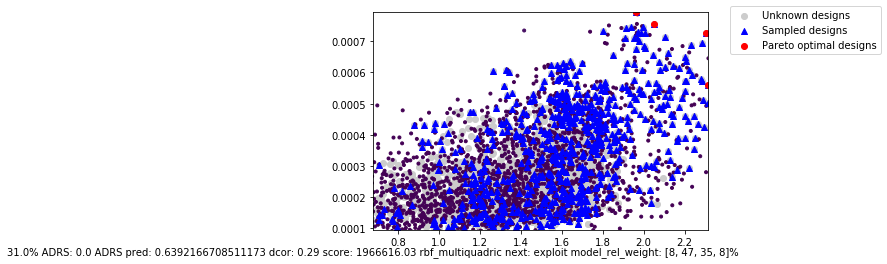

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.31),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest-gpy", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([1423, 1398, 1399,  752,  750, 2242, 2238, 2233, 2234, 2236, 2249,
       2239, 2172,  542, 2167, 1167, 1751, 1789,  509, 1198, 2188, 1861,
       2176, 1752, 1675, 1701, 2219, 2224, 2220, 1072, 1677,  109, 2161,
        544, 2168, 2145, 2175, 2160, 1676, 1068, 1069, 1103,    1,  106,
          0,    2, 1070, 1168,  543,  105,    3, 1102,   34, 2231,   76,
       2230, 1067,  440,  441,  103,  442, 2146, 2180,  107,    6, 2005,
        140,  475,  141,  476,   32,  143, 1105,  144,    5,  142,  108,
        443, 2147, 1224, 1687, 2169,  479, 1702, 2226, 2228, 1104,  477,
       1703, 1704,  478,    4, 2190,  145, 1782, 1776, 2148, 1203, 2218,
       1047,   28, 2229, 2225, 2154, 1137, 2179,  444, 2211, 2099, 2241,
       1204, 2244, 1071, 1882, 1106, 2153, 1139,  445, 2232,  209, 1136,
       1906, 2189, 2243,  210,   36, 2208, 1225, 2203, 2201, 2213, 2240,
       2158, 2221, 1846, 2182, 2166, 2209, 2215, 1008, 1720, 2171, 2210,
        110, 1073, 2185, 1938, 2199, 2217, 2222,   